In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_error

from tqdm.notebook import tqdm

C:\Users\abdul\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('KAG_energydata_complete.csv')

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
info_dict = {"Appliances":"energy use in Wh",
"lights":"energy use of light fixtures in the house in Wh",
"T1":"Temperature in kitchen area, in Celsius",
"RH_1":"Humidity in kitchen area, in %",
"T2":"Temperature in living room area, in Celsius",
"RH_2":"Humidity in living room area, in %",
"T3":"Temperature in laundry room area",
"RH_3":"Humidity in laundry room area, in %",
"T4":"Temperature in office room, in Celsius",
"RH_4":"Humidity in office room, in %",
"T5":"Temperature in bathroom, in Celsius",
"RH_5":"Humidity in bathroom, in %",
"T6":"Temperature outside the building (north side), in Celsius",
"RH_6":"Humidity outside the building (north side), in %",
"T7":"Temperature in ironing room , in Celsius",
"RH_7":"Humidity in ironing room, in %",
"T8":"Temperature in teenager room 2, in Celsius",
"RH_8":"Humidity in teenager room 2, in %",
"T9":"Temperature in parents room, in Celsius",
"RH_9":"Humidity in parents room, in %",
"To":"Temperature outside (from Chievres weather station), in Celsius",
"Pressure":"(from Chievres weather station), in mm Hg",
"RH_out":"Humidity outside (from Chievres weather station), in %",
"Wind speed":"(from Chievres weather station), in m/s",
"Visibility":"(from Chievres weather station), in km",
"Tdewpoint":"(from Chievres weather station), Â°C",
"rv1":"Random variable 1, nondimensional",
"rv2":"Random variable 2, nondimensional"}

In [5]:
info_df = pd.DataFrame.from_dict(info_dict, orient='index', columns=['Info about column'])

In [6]:
info_df

,Info about column
Appliances,energy use in Wh
lights,energy use of light fixtures in the house in Wh
T1,"Temperature in kitchen area, in Celsius"
RH_1,"Humidity in kitchen area, in %"
T2,"Temperature in living room area, in Celsius"
RH_2,"Humidity in living room area, in %"
T3,Temperature in laundry room area
RH_3,"Humidity in laundry room area, in %"
T4,"Temperature in office room, in Celsius"
RH_4,"Humidity in office room, in %"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [9]:
#Null values

for column in df.columns:
    print('column', column, 'contains', df[column].isnull().sum(), 'null values')

column date contains 0 null values
column Appliances contains 0 null values
column lights contains 0 null values
column T1 contains 0 null values
column RH_1 contains 0 null values
column T2 contains 0 null values
column RH_2 contains 0 null values
column T3 contains 0 null values
column RH_3 contains 0 null values
column T4 contains 0 null values
column RH_4 contains 0 null values
column T5 contains 0 null values
column RH_5 contains 0 null values
column T6 contains 0 null values
column RH_6 contains 0 null values
column T7 contains 0 null values
column RH_7 contains 0 null values
column T8 contains 0 null values
column RH_8 contains 0 null values
column T9 contains 0 null values
column RH_9 contains 0 null values
column T_out contains 0 null values
column Press_mm_hg contains 0 null values
column RH_out contains 0 null values
column Windspeed contains 0 null values
column Visibility contains 0 null values
column Tdewpoint contains 0 null values
column rv1 contains 0 null values
colum

In [10]:
for column in df.columns:
    print('column', column, 'contains', df[column].nunique(), 'unique values')

column date contains 19735 unique values
column Appliances contains 92 unique values
column lights contains 8 unique values
column T1 contains 722 unique values
column RH_1 contains 2547 unique values
column T2 contains 1650 unique values
column RH_2 contains 3376 unique values
column T3 contains 1426 unique values
column RH_3 contains 2618 unique values
column T4 contains 1390 unique values
column RH_4 contains 2987 unique values
column T5 contains 2263 unique values
column RH_5 contains 7571 unique values
column T6 contains 4446 unique values
column RH_6 contains 9709 unique values
column T7 contains 1955 unique values
column RH_7 contains 5891 unique values
column T8 contains 2228 unique values
column RH_8 contains 6649 unique values
column T9 contains 924 unique values
column RH_9 contains 3388 unique values
column T_out contains 1730 unique values
column Press_mm_hg contains 2189 unique values
column RH_out contains 566 unique values
column Windspeed contains 189 unique values
col

In [11]:
df.drop(columns=['rv1', 'rv2'], inplace=True)

In [12]:
df.drop(columns=['date'], inplace=True)

In [13]:
df.corrwith(df.Appliances).abs()

Appliances     1.000000
lights         0.197278
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2           0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6           0.083178
T7             0.025801
RH_7           0.055642
T8             0.039572
RH_8           0.094039
T9             0.010010
RH_9           0.051462
T_out          0.099155
Press_mm_hg    0.034885
RH_out         0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015353
dtype: float64

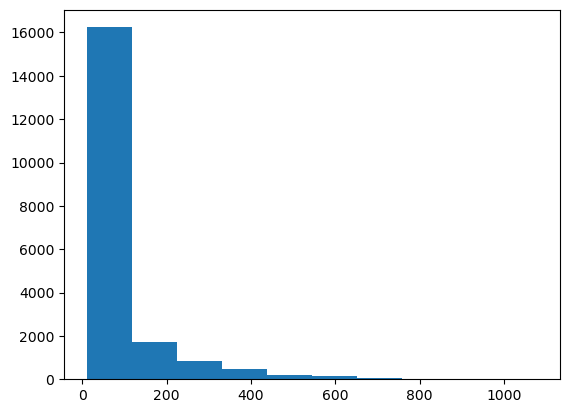

In [14]:
plt.hist(df.Appliances)
plt.show()

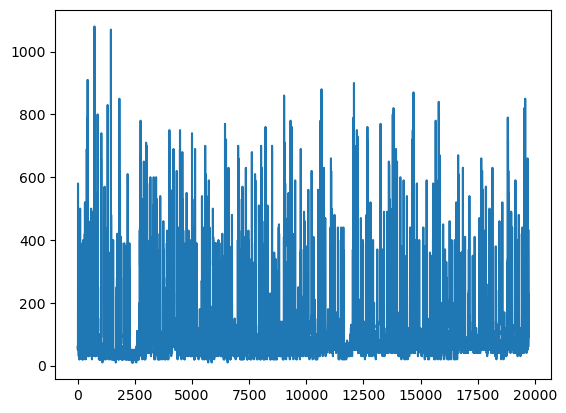

In [15]:
plt.plot(df.Appliances)

Text(0.5, 1.0, 'Temperature in the building')

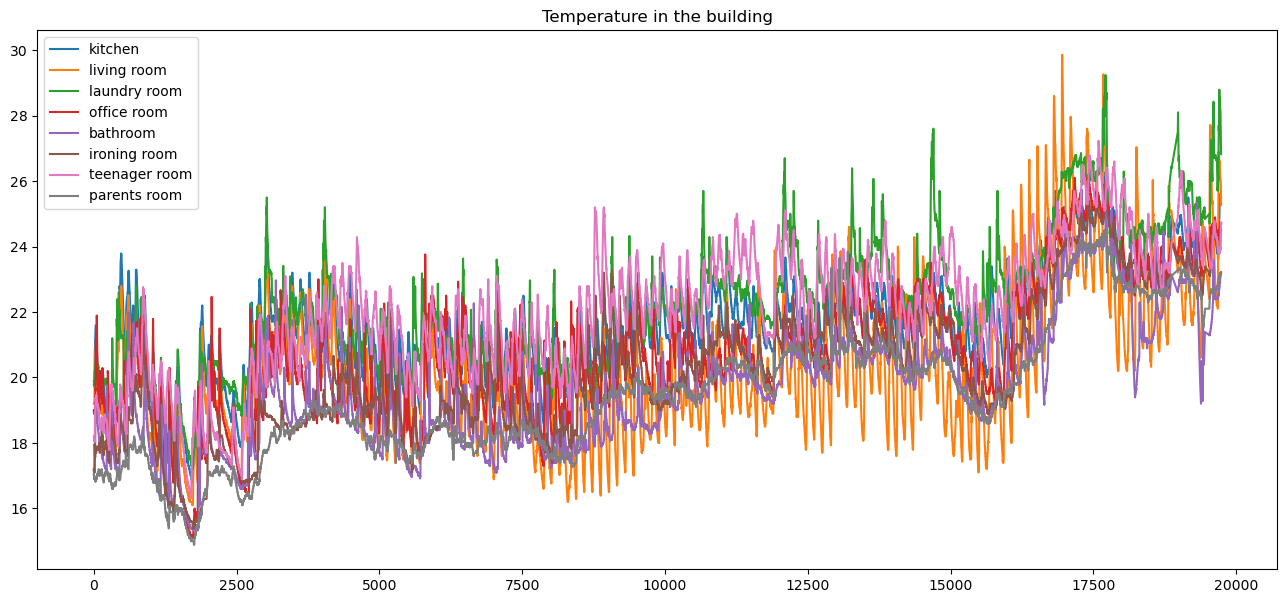

In [16]:
plt.figure(figsize=(16,7))
plt.plot(df.T1)
plt.plot(df.T2)
plt.plot(df.T3)
plt.plot(df.T4)
plt.plot(df.T5)
plt.plot(df.T7)
plt.plot(df.T8)
plt.plot(df.T9)
plt.legend(('kitchen', 'living room', 'laundry room', 'office room', 'bathroom', 'ironing room', 'teenager room', 'parents room'))
plt.title('Temperature in the building')


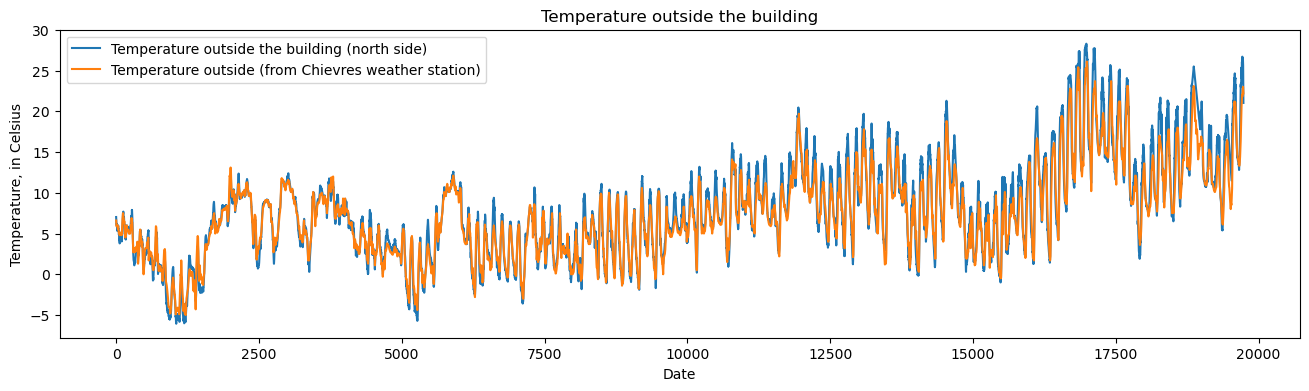

In [17]:
plt.figure(figsize=(16,4))
plt.plot(df.T6)
plt.plot(df.T_out)
plt.title('Temperature outside the building')
plt.xlabel('Date')
plt.ylabel('Temperature, in Celsius')
plt.legend(('Temperature outside the building (north side)', 'Temperature outside (from Chievres weather station)'))
plt.show()

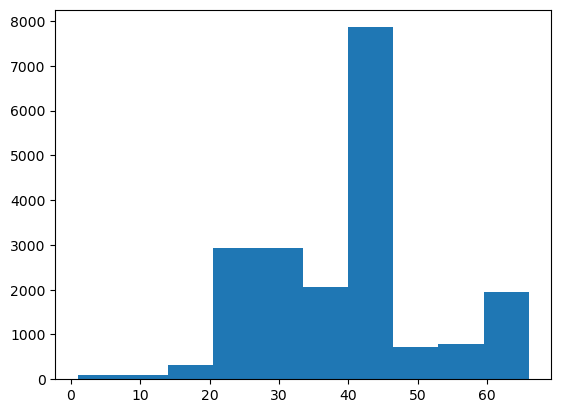

In [18]:
plt.hist(df.Visibility)
plt.show()

In [19]:
df_full, df_test = train_test_split(df, test_size=0.2, random_state=123)
df_train, df_val = train_test_split(df_full, test_size=0.25, random_state=123)

In [20]:
len(df_train), len(df_val), len(df_test)

(11841, 3947, 3947)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_full = df_full['Appliances'].values
y_train = df_train['Appliances'].values
y_val = df_val['Appliances'].values
y_test = df_test['Appliances'].values

del df_full['Appliances']
del df_train['Appliances']
del df_val['Appliances']
del df_test['Appliances']

In [23]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [24]:
train_norm = normalize(X_train)
val_norm = normalize(X_val)

In [25]:
dt = DecisionTreeRegressor()

In [26]:
dt.fit(train_norm, y_train)

DecisionTreeRegressor()

In [27]:
predictions = dt.predict(val_norm)

In [28]:
mse_val = mean_squared_error(y_val, predictions)
print(mse_val)

10653.230301494807


In [29]:
mae_val = mean_absolute_error(y_val, predictions)
print(mae_val)

45.216620217887005


In [30]:
min_samples_leaf = [1, 2, 5, 10, 15, 20, 100, 200, 500]
max_depth = np.arange(1, 15, 1)

In [31]:
summary_tree = []

for d in tqdm(max_depth):
    for s in min_samples_leaf:
        model_tree = DecisionTreeRegressor(max_depth=d, min_samples_leaf=s)
        model_tree.fit(train_norm, y_train)
        predictions = model_tree.predict(val_norm)
        mse_val = mean_squared_error(y_val, predictions)
        mae_val = mean_absolute_error(y_val, predictions)
        
        summary_tree.append([d, s, mse_val, mae_val])
        
summary_tree = pd.DataFrame(summary_tree, columns=['max_depth', 'min_sample_leaf', 'mse_val', 'mae_val'])

  0%|          | 0/14 [00:00<?, ?it/s]

In [32]:
summary_tree.sort_values(by=['mse_val']).head(10)

,max_depth,min_sample_leaf,mse_val,mae_val
111,13,10,7498.476201,43.850758
122,14,20,7563.585436,45.007303
120,14,10,7598.436540,43.871214
113,13,20,7606.196810,45.089288
95,11,20,7606.634374,45.464410
104,12,20,7638.067056,45.480379
102,12,10,7645.504650,44.503349
86,10,20,7668.852528,45.930299
93,11,10,7691.396685,44.784095
103,12,15,7713.783023,45.583376


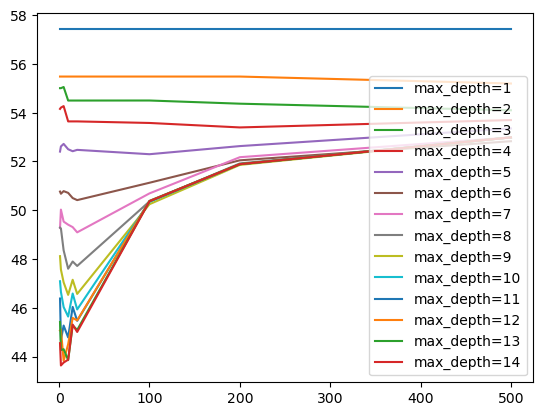

In [33]:
for d in np.arange(1, 15, 1):    
    df_subset = summary_tree[summary_tree.max_depth == d]
    plt.plot(df_subset.min_sample_leaf ,df_subset.mae_val, label='max_depth=%d' % d)
plt.legend()

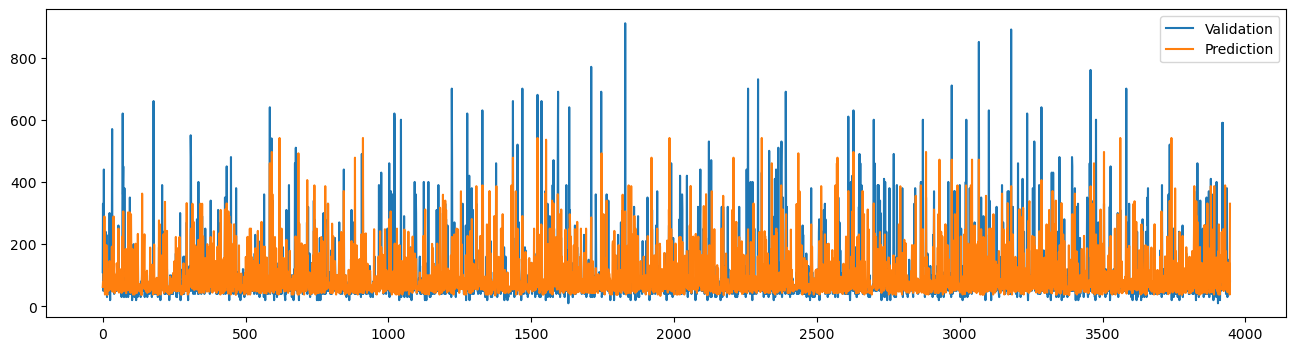

In [34]:
model_tree = DecisionTreeRegressor(max_depth=13, min_samples_leaf=10)
model_tree.fit(train_norm, y_train)
predictions = model_tree.predict(val_norm)
plt.figure(figsize=(16,4))
plt.plot(y_val)
plt.plot(predictions)
plt.legend(['Validation', 'Prediction'])
plt.show()

In [35]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [36]:
dtrain = xgb.DMatrix(train_norm, label=y_train)
dval = xgb.DMatrix(val_norm, label=y_val)

In [37]:
regressor=xgb.XGBRegressor(eval_metric='rmsle')

In [38]:
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

In [39]:
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_norm, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 6, 'n_estimators': 700}


In [40]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

In [41]:
regressor.fit(train_norm, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
predictions = regressor.predict(val_norm)

In [43]:
mse_val = mean_squared_error(y_val, predictions)
print(mse_val)

5708.7335471266415


In [44]:
mae_val = mean_absolute_error(y_val, predictions)
print(mae_val)

39.31265455854371


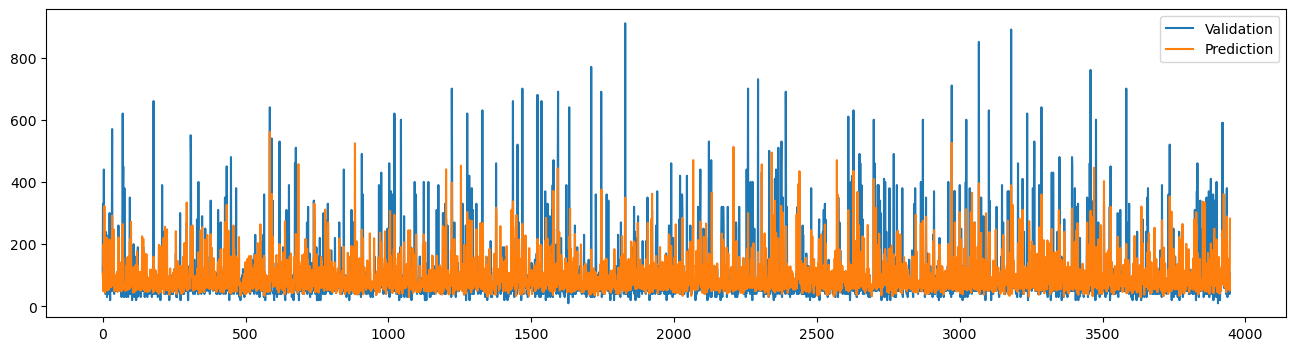

In [45]:
plt.figure(figsize=(16,4))
plt.plot(y_val)
plt.plot(predictions)
plt.legend(['Validation', 'Prediction'])
plt.show()

In [46]:
from sklearn.preprocessing import Normalizer

In [47]:
def train(df_train, y_train):
    dv = DictVectorizer(sparse=False)
    df_dict_train = df_train.to_dict(orient="records")
    X_train = dv.fit_transform(df_dict_train)
    transformer = Normalizer()
    X_train_norm = Normalizer().fit_transform(X_train)
    
    regressor=xgb.XGBRegressor(learning_rate = 0.015,
                           n_estimators  = 700,
                           max_depth     = 6,
                           eval_metric='rmsle')
    
    regressor.fit(X_train_norm, y_train)
    
    return dv, transformer, regressor

In [48]:
dv, transformer, regressor = train(df_train, y_train)

In [49]:
def predict(df, dv, transformer, regressor):
    
    df_dict = df.to_dict(orient="records")

    X = dv.transform(df_dict)
    X_norm = transformer.transform(X)
    y_pred = regressor.predict(X_norm)

    return y_pred

In [50]:
y_pred = predict(df_val, dv, transformer, regressor)

In [52]:
dv, transformer, regressor = train(df_full, y_full)
y_pred = predict(df_test, dv, transformer, regressor)

In [53]:
mse_val = mean_squared_error(y_test, y_pred)
print(mse_val)

6010.213644232191


In [54]:
mae_val = mean_absolute_error(y_test, y_pred)
print(mae_val)

38.88324075848174


In [55]:
import pickle

In [56]:
output_file = 'model_regressor.bin'

In [57]:
f_out = open(output_file, 'wb')
pickle.dump((dv, transformer, regressor), f_out)
f_out.close()